In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
swi=0.2
soi=0.8
sor=0.25
visc_water=1
visc_oil=[10,50,100,500,5000]

rec=np.arange(0.01,0.51,step=0.01)

In [4]:
snorm=[]
sw_calc=[]
so_calc=[]
krw_calc=[]
kro_calc=[]
fw_calc_10=[]
fw_calc_50=[]
fw_calc_100=[]
fw_calc_500=[]
fw_calc_5000=[]

fw_arr=[fw_calc_10,fw_calc_50,fw_calc_100,fw_calc_500,fw_calc_5000]

for i in range(len(rec)) :
    
    so=soi-soi*rec[i]
    sw=1-so
    s_norm=(sw-swi)/(1-swi-sor)
    krw=s_norm**3
    kro=(1-s_norm)**3
    
    for j in range(5) :
            fw=1/(1+((kro*visc_water)/(krw*visc_oil[j])))
            fw_arr[j].append(fw)

    snorm.append(s_norm)
    sw_calc.append(sw)
    so_calc.append(so)
    kro_calc.append(kro)
    krw_calc.append(krw)
    

In [5]:
df=pd.DataFrame()

In [6]:
df['Recovery']=pd.Series(rec)
df['Oil Saturation']= pd.Series(so_calc)
df['Water Saturation']=pd.Series(sw_calc)
df['Normalized Water Saturation']=pd.Series(snorm)
df['Relative Water Permeability']=pd.Series(krw_calc)
df['Relative Oil Permeability']=pd.Series(kro_calc)
df['Fw at 10cp']=pd.Series(fw_calc_10)
df['Fw at 50cp']=pd.Series(fw_calc_50)
df['Fw at 100cp']=pd.Series(fw_calc_100)
df['Fw at 500cp']=pd.Series(fw_calc_500)
df['Fw at 5000cp']=pd.Series(fw_calc_5000)

In [7]:
fw_names=['Fw at 10cp', 'Fw at 50cp', 'Fw at 100cp','Fw at 500cp', 'Fw at 5000cp']
print(df)

    Recovery  Oil Saturation  Water Saturation  Normalized Water Saturation  \
0       0.01           0.792             0.208                     0.014545   
1       0.02           0.784             0.216                     0.029091   
2       0.03           0.776             0.224                     0.043636   
3       0.04           0.768             0.232                     0.058182   
4       0.05           0.760             0.240                     0.072727   
5       0.06           0.752             0.248                     0.087273   
6       0.07           0.744             0.256                     0.101818   
7       0.08           0.736             0.264                     0.116364   
8       0.09           0.728             0.272                     0.130909   
9       0.10           0.720             0.280                     0.145455   
10      0.11           0.712             0.288                     0.160000   
11      0.12           0.704             0.296      

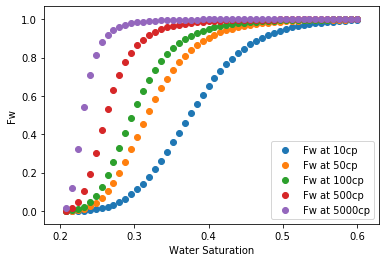

In [8]:
for item in fw_names :
    water=plt.scatter('Water Saturation' , item, data=df )
    plt.xlabel('Water Saturation')
    plt.ylabel('Fw')
    plt.legend()
    print(water)

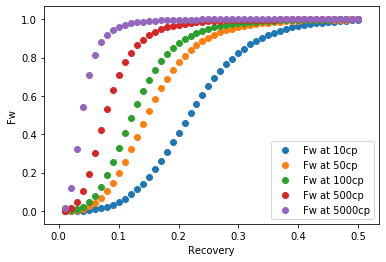

In [9]:
for item in fw_names:  
    rec_plot = plt.scatter( 'Recovery' , item,  data=df )
    plt.xlabel('Recovery')
    plt.ylabel('Fw')
    plt.legend()
    print(rec_plot)